# Titanic Survival Analysis

## 1. Introduction & Objective

In this mini-project, we explore the survival patterns of Titanic passengers using the famous Titanic dataset.

**Objective:**  
Identify which categories of passengers were most likely to survive the disaster.

**Workflow:**  
- Data loading and cleaning  
- Feature engineering (new variables)  
- Exploratory Data Analysis (EDA)  
- Visual insights and conclusions  

---

## 2. Data Loading & Overview

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

# Load dataset
df = pd.read_csv('sample_data/train.csv')
df.head()

# Quick overview
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


---

## 3. Data Cleaning

In [12]:
print("Missing values before cleaning:")
print(df.isnull().sum())

# Fill missing Age with median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill missing Embarked with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop Cabin safely if exists
df.drop(columns=['Cabin'], errors='ignore', inplace=True)

print("\nMissing values after cleaning:")
print(df.isnull().sum())

Missing values before cleaning:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing values after cleaning:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


---

## 4. Feature Engineering

In [14]:
# FamilySize = SibSp + Parch + 1
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# AgeGroup bins
age_bins = [0, 12, 18, 35, 60, 80]
age_labels = ['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# FareGroup bins
fare_bins = [0, 7.91, 14.454, 31, df['Fare'].max()]
fare_labels = ['Low', 'Average', 'High', 'Very High']
df['FareGroup'] = pd.cut(df['Fare'], bins=fare_bins, labels=fare_labels, include_lowest=True)

df[['Age', 'AgeGroup', 'Fare', 'FareGroup', 'FamilySize']].head()

,Age,AgeGroup,Fare,FareGroup,FamilySize
0,22.0,Young Adult,7.2500,Low,2
1,38.0,Adult,71.2833,Very High,2
2,26.0,Young Adult,7.9250,Average,1
3,35.0,Adult,53.1000,Very High,2
4,35.0,Adult,8.0500,Average,1


---

## 5. Exploratory Data Analysis

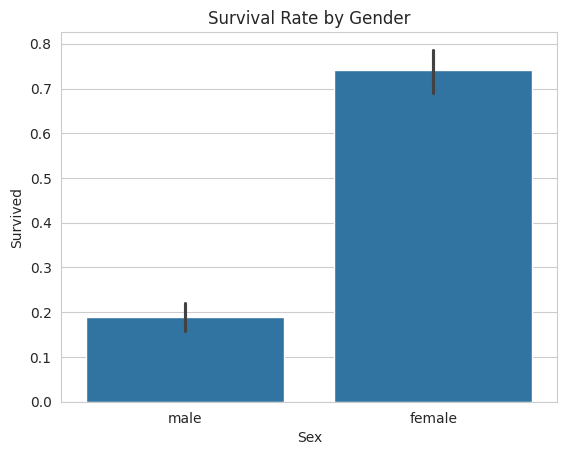

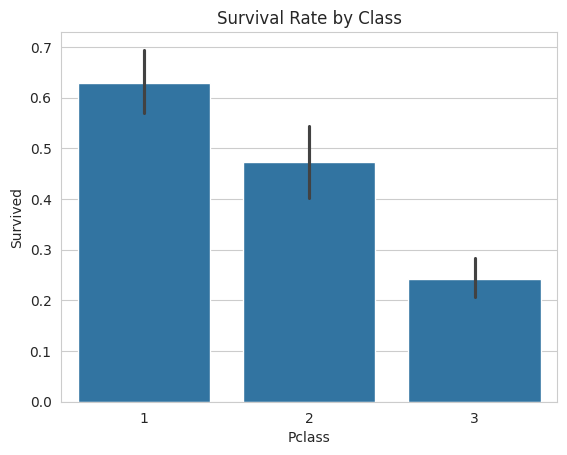

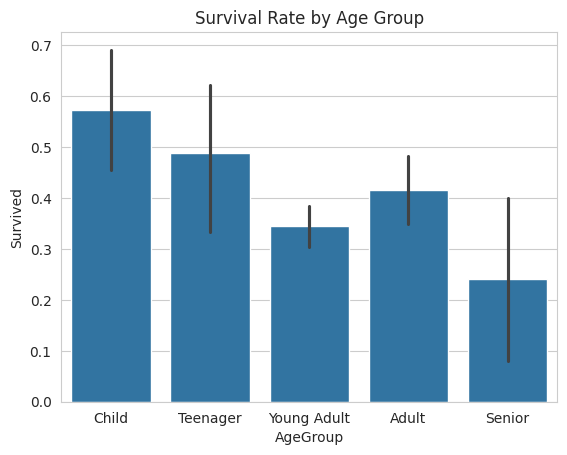

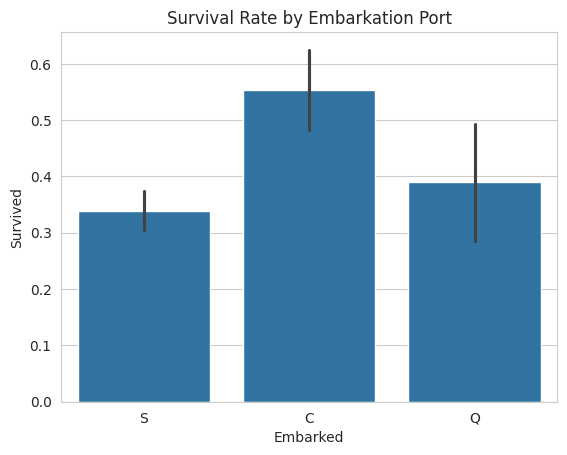

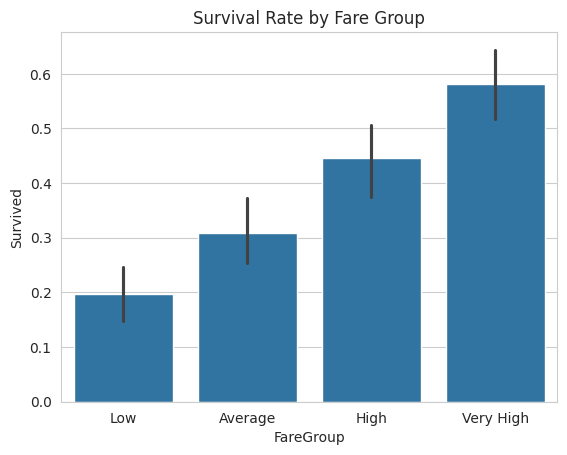

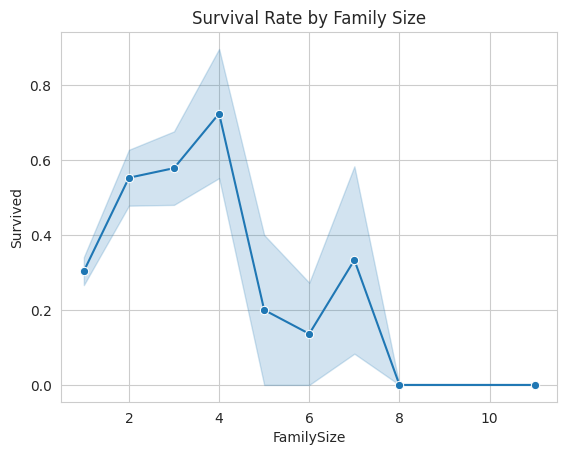

In [15]:
# Survival rate by Gender
sns.barplot(data=df, x='Sex', y='Survived')
plt.title('Survival Rate by Gender')
plt.show()

# Survival rate by Passenger Class
sns.barplot(data=df, x='Pclass', y='Survived')
plt.title('Survival Rate by Class')
plt.show()

# Survival by AgeGroup
sns.barplot(data=df, x='AgeGroup', y='Survived', order=age_labels)
plt.title('Survival Rate by Age Group')
plt.show()

# Survival by Embarked
sns.barplot(data=df, x='Embarked', y='Survived')
plt.title('Survival Rate by Embarkation Port')
plt.show()

# Survival by FareGroup
sns.barplot(data=df, x='FareGroup', y='Survived', order=fare_labels)
plt.title('Survival Rate by Fare Group')
plt.show()

# Survival by FamilySize
sns.lineplot(data=df, x='FamilySize', y='Survived', marker='o')
plt.title('Survival Rate by Family Size')
plt.show()

---

## Additional Analysis: Survival by Gender + Class

Survival rate by Gender:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Survival rate by Gender + Class:
Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64


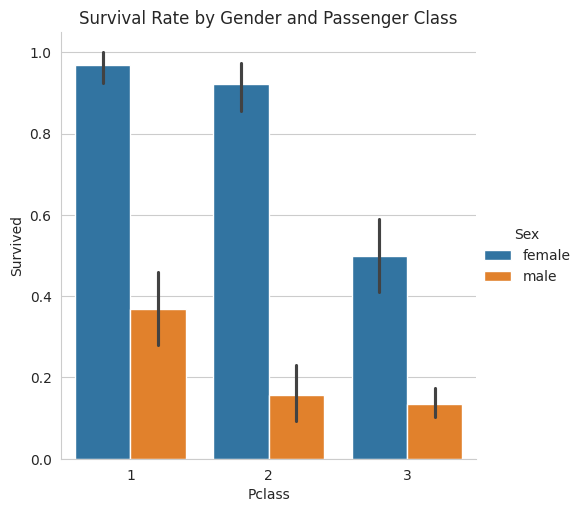

In [16]:
# Survival rate by Gender
print("Survival rate by Gender:")
print(df.groupby('Sex')['Survived'].mean())

# Survival rate by Gender and Class
print("\nSurvival rate by Gender + Class:")
print(df.groupby(['Sex', 'Pclass'])['Survived'].mean())

# Visualize survival by Gender and Class
sns.catplot(data=df, x='Pclass', y='Survived', hue='Sex', kind='bar')
plt.title('Survival Rate by Gender and Passenger Class')
plt.show()

This confirms that **women survived more often than men, especially in higher classes**.

---

## 6. Key Insights & Conclusion

**Key Findings:**  
- **Women survived more often than men**, especially in higher classes.  
- **Children (0–12 years)** had higher survival chances.  
- **1st Class passengers** had the best survival rates regardless of gender.  
- Passengers with **small families (2–4 members)** were more likely to survive.  
- Passengers embarking from **Cherbourg** had better survival rates than those from other ports.  

**Conclusion:**  
The survival on Titanic was strongly influenced by **gender, age, and socioeconomic status (class & fare)**.  
These insights align with the historical narrative of *"women and children first"* during evacuation.